Use GPU
=====================
you need to change the runtime to GPU's runtime by Runtime -> Change runtime type

In [1]:
!nvidia-smi

Thu Oct  8 04:27:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


Packages
===========

In [3]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

Auxiliary Function
========================

In [4]:
# print all attributes
def DCG_node(listValue):
    for (i, v) in enumerate(listValue):
        print(f"{i}.data: {v.data}\n{i}.requires_grad: {v.requires_grad}\n{i}.grad: {v.grad}\n{i}.grad_fn: {v.grad_fn}\n{i}.is_leaf: {v.is_leaf}\n")

Test softmax and cross-entropy
===================================

In [6]:
loss = nn.CrossEntropyLoss()
input = torch.FloatTensor([[0.1, 0.7, 0.1, 0.1],
                          [0.2, 0.6, 0.1, 0.1],
                          [0.5, 0.2, 0.2, 0.1]])
target = torch.FloatTensor([1, 1, 0]).type(torch.long)
output = loss(input, target)
output

tensor(1.0601)

In [7]:
loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
input = torch.FloatTensor([[0.1, 0.7, 0.1, 0.1, 0.1],
                          [0.2, 0.6, 0.1, 0.1, 0.1],
                          [0.5, 0.2, 0.2, 0.1, 0.1]])
target = torch.empty(3, dtype=torch.long).random_(5)
print(target)
output = loss(input, target)


tensor([1, 4, 0])


In [8]:
print(output)

tensor(1.4175)


CNN1
===================
The input channel is one since it is a grey picture  
We design as follow, but the output should be 10 since here are 10 unique labels

In [5]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # 27 * 27 -> 25 * 25 -> 12 * 12 
        self.conv2 = nn.Conv2d(32, 32, 3) # 12 * 12 -> 10 * 10 -> 5 * 5
        self.conv3 = nn.Conv2d(32, 64, 2) # 5 * 5 -> 4 * 4 -> 2 * 2 
        self.fc1   = nn.Linear(64 * 2 * 2, 40)
        self.fc2   = nn.Linear(40, 10)
        self.softmax = nn.Softmax(dim=1)
        self.ce = nn.CrossEntropyLoss()
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # the same as (2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

    # x.size(0) = y.size(0)
    def loss(self, x, y):
        loss = self.ce(x, y)
        return loss

net1 = CNN1().cuda()
print(net1)

CNN1(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
  (ce): CrossEntropyLoss()
)


In [ ]:
m = nn.Softmax(dim=1)
input = torch.FloatTensor([[1, 1, 1], [2, 2, 2]])
print(input)
output = m(input)
output

tensor([[1., 1., 1.],
        [2., 2., 2.]])


tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])

CNN2
=================

In [ ]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 6) # 27 * 27 -> 22 * 22 -> 11 * 11 
        self.fc1   = nn.Linear(6 * 11 * 11, 10)
        self.softmax = nn.Softmax(dim=1)
        self.ce = nn.CrossEntropyLoss()
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # the same as (2, 2)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = self.softmax(x)
        return x

    # x.size(0) = y.size(0)
    def loss(self, x, y):
        loss = self.ce(x, y)
        return loss

In [ ]:
net2 = CNN2()
print(net2)

CNN2(
  (conv1): Conv2d(1, 6, kernel_size=(6, 6), stride=(1, 1))
  (fc1): Linear(in_features=726, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
  (ce): CrossEntropyLoss()
)


Import MNIST dataset and handle with it
=================================
import handwritten digits directly

In [6]:
from tensorflow.keras.datasets import mnist
(X_train_numpy, Y_train_numpy), (X_test_numpy, Y_test_numpy) = mnist.load_data()

In [7]:
print(f"x_train's shape is {X_train_numpy.shape}\n x_test's shape is {X_test_numpy.shape}\n \
y_train's shape is {Y_train_numpy.shape}\n y_test's shape is {Y_test_numpy.shape}")

x_train's shape is (60000, 28, 28)
 x_test's shape is (10000, 28, 28)
 y_train's shape is (60000,)
 y_test's shape is (10000,)


check the image

In [18]:
def show_image(i):
    image = X_train_numpy[i]
    plt.imshow(image)
    plt.title(Y_train_numpy[i])
    plt.show()

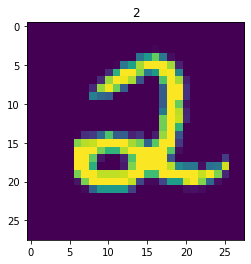

In [21]:
show_image(29726)

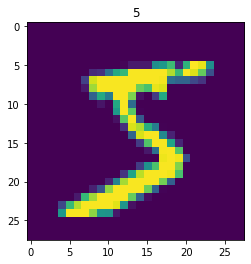

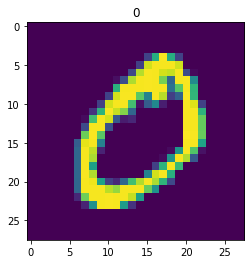

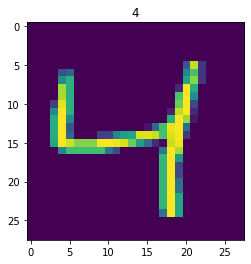

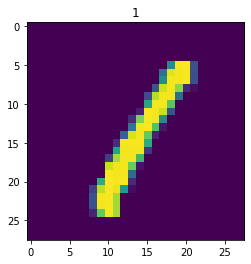

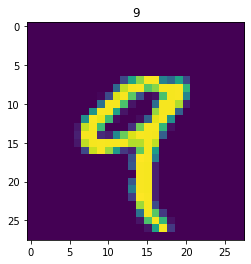

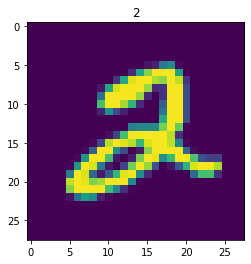

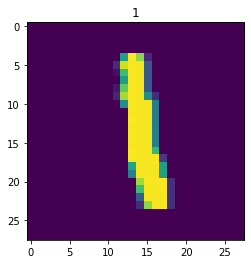

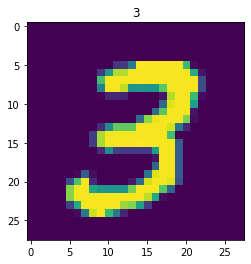

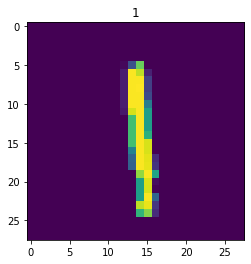

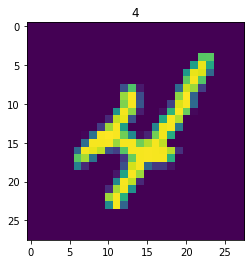

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
    show_image(i)


check the label

In [8]:
label = set(Y_train_numpy)
label

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

***convert X_trian and X_test into torch and reshape in GPU***
-----------------

In [12]:
def reshape_dataset(X):
    [d1, d3, d4] = torch.from_numpy(X).size()
    X = torch.from_numpy(X).view(d1, -1, d3, d4).type(torch.FloatTensor)
    return torch.div(X, 256)

X_train = reshape_dataset(X_train_numpy)[30000:60000, 0:1, 0:28, 0:28].cuda()
X_test = reshape_dataset(X_test_numpy).cuda()
print(f"{X_train.size()} \n {X_test.size()}") # batch size, in_channel, height, width

torch.Size([30000, 1, 28, 28]) 
 torch.Size([10000, 1, 28, 28])


***convert y to torch in GPU***
---------------------------

In [13]:
Y_train = torch.from_numpy(Y_train_numpy).type(torch.long)[30000:60000].cuda()
Y_test = torch.from_numpy(Y_test_numpy).type(torch.long).cuda()
print(f"{Y_train.size()} \n {Y_test.size()}")

torch.Size([30000]) 
 torch.Size([10000])


Forward
====================

In [48]:
out = net1(X_train)
out.size()

torch.Size([30000, 10])

In [35]:
out[0]

tensor([0.0900, 0.0999, 0.1171, 0.0890, 0.0896, 0.1028, 0.1144, 0.1086, 0.0979,
        0.0907], device='cuda:0', grad_fn=<SelectBackward>)

In [ ]:
out.size()

torch.Size([60000, 10])

Loss function
=====================
We use cross-entropy as our loss function, this pair with softmax

In [ ]:
loss = net1.loss(out, Y_train)

In [ ]:
loss

tensor(2.3029, grad_fn=<NllLossBackward>)

Back propagation
=======================

In [ ]:
net1.zero_grad()
loss.backward()

check weights and bias

In [ ]:
DCG_node([net1.conv1.weight, net1.conv1.bias, net1.conv2.weight, 
          net1.conv2.bias, net1.fc1.weight, net1.fc1.bias,
          net1.fc2.weight, net1.fc2.bias, net1.fc3.weight,
          net1.fc3.bias])

0.data: tensor([[[[-0.1812,  0.1275, -0.1644, -0.1037],
          [ 0.0891, -0.2453, -0.0049,  0.0208],
          [ 0.1527, -0.0640,  0.1145,  0.2049],
          [-0.1695,  0.1270,  0.1877, -0.1871]]],


        [[[-0.1494, -0.0497,  0.0093, -0.2106],
          [ 0.1031, -0.2077,  0.0732,  0.0517],
          [-0.1320, -0.0500, -0.1707,  0.0752],
          [-0.0611, -0.0380,  0.0450, -0.1471]]],


        [[[-0.1556, -0.1739,  0.0063, -0.1543],
          [-0.1362, -0.1233,  0.2384, -0.0670],
          [-0.2100,  0.1638, -0.1749, -0.0352],
          [-0.0335,  0.2140, -0.1431,  0.1755]]],


        [[[ 0.0342,  0.0789, -0.0909,  0.2286],
          [ 0.2257, -0.0991, -0.1301, -0.0044],
          [-0.0696,  0.0591,  0.1882,  0.0096],
          [-0.1273, -0.0149,  0.1525,  0.1847]]],


        [[[ 0.1079, -0.0494, -0.0067,  0.0446],
          [ 0.0077,  0.0878,  0.1800,  0.0639],
          [-0.0105,  0.0399, -0.0502, -0.0392],
          [-0.0399,  0.1761, -0.0536,  0.2372]]],


        [[[ 

In [ ]:
for p in list(net1.parameters()):
    print(p.size())

torch.Size([6, 1, 4, 4])
torch.Size([6])
torch.Size([10, 6, 3, 3])
torch.Size([10])
torch.Size([100, 250])
torch.Size([100])
torch.Size([80, 100])
torch.Size([80])
torch.Size([10, 80])
torch.Size([10])


Update (**Here**) CNN1
===================
1. change runtime to GPU (Runtime -> Change runtime type)
2. packages
3. CNN
4. import dataset
5. run the following code

In [10]:
from tqdm.notebook import tnrange, tqdm_notebook

in 0: loss is 1.5000025033950806, accu is 0.9635
in 100: loss is 1.4945827722549438, accu is 0.9696
in 200: loss is 1.492148756980896, accu is 0.9718333333333333
in 300: loss is 1.4986165761947632, accu is 0.9652666666666667
in 400: loss is 1.4933531284332275, accu is 0.9705666666666667
in 500: loss is 1.4898167848587036, accu is 0.9739666666666666
in 600: loss is 1.4906543493270874, accu is 0.9734333333333334
in 700: loss is 1.48751699924469, accu is 0.9764
in 800: loss is 1.486560344696045, accu is 0.9772333333333333
in 900: loss is 1.4885319471359253, accu is 0.9750333333333333
in 1000: loss is 1.4871225357055664, accu is 0.9762333333333333
in 1100: loss is 1.4842890501022339, accu is 0.9794
in 1200: loss is 1.4848029613494873, accu is 0.9792
in 1300: loss is 1.4861586093902588, accu is 0.9771
in 1400: loss is 1.4845669269561768, accu is 0.9792666666666666
in 1500: loss is 1.4825025796890259, accu is 0.9812
in 1600: loss is 1.481762409210205, accu is 0.9821666666666666
in 1700: loss

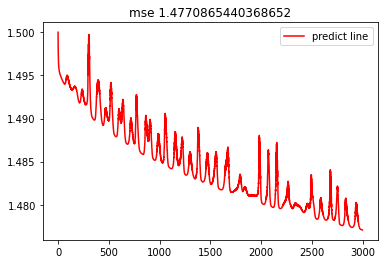

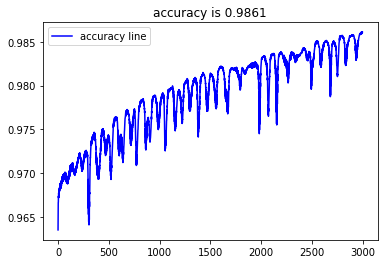

In [14]:
optimizer = optim.SGD(net1.parameters(), lr=0.1)
epochs = 3000
epoch_list = []
loss_list = []
correct_list = []


for epoch in tnrange(epochs, desc='epoch'):
    optimizer.zero_grad()
    out = net1(X_train)
    loss = net1.loss(out, Y_train)
    loss.backward()
    optimizer.step()    # Does the update
    epoch_list.append(epoch)
    loss_list.append(loss.item())

    # accuracy
    pred = out.data.max(1, keepdim=False)[1]
    correct = pred.eq(Y_train.data.view_as(pred)).cpu().detach().sum()
    correct_rate = correct.detach().item() / 30000
    correct_list.append(correct_rate)

    if(epoch % 100 == 0):
        print(f"in {epoch}: loss is {loss}, accu is {correct_rate}")

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse {loss}")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=correct_list, color='blue', label='accuracy line', ax=ax)
plt.title(f"accuracy is {correct_rate}")
plt.show()

***Update (Here) CNN2***
==============================

In [ ]:
optimizer = optim.SGD(net2.parameters(), lr=0.01)
epochs = 3000
epoch_list = []
loss_list = []
fig, ax = plt.subplots()
lr = 0.01

for epoch in tnrange(epochs, desc='epoch'):
    optimizer.zero_grad()
    out = net2(X_train)
    loss = net2.loss(out, Y_train)
    loss.backward()
    optimizer.step()    # Does the update
    # net1.conv1.weight.data = (net1.conv1.weight.data - lr * net1.conv1.weight.grad).detach()
    # net1.conv1.bias.data = (net1.conv1.bias.data - lr * net1.conv1.bias.grad).detach()
    # net1.conv2.weight.data = (net1.conv2.weight.data - lr * net1.conv2.weight.grad).detach()
    # net1.conv2.bias.data = (net1.conv2.bias.data - lr * net1.conv2.bias.grad).detach()
    # net1.fc1.weight.data = (net1.fc1.weight.data - lr * net1.fc1.weight.grad).detach()
    # net1.fc1.bias.data = (net1.fc1.bias.data - lr * net1.fc1.bias.grad).detach()
    # net1.fc2.weight.data = (net1.fc2.weight.data - lr * net1.fc2.weight.grad).detach()
    # net1.fc2.bias.data = (net1.fc2.bias.data - lr * net1.fc2.bias.grad).detach()
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    if(epoch % 100 == 0):
        print(f"in {epoch}: {loss}")

sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse {loss}")

in 0: 1.8229023218154907
in 100: 1.7807170152664185
in 200: 1.7333829402923584
in 300: 1.692622423171997
in 400: 1.671080231666565
in 500: 1.6565799713134766


Please check the out although the loss is not awesome
======================
use numpy argmax to find the index of the max value

In [16]:
import numpy as np

In [19]:
pred = out.data.max(1, keepdim=False)[1]
pred

tensor([5, 0, 4,  ..., 6, 7, 1], device='cuda:0')

In [20]:
correct = pred.eq(Y_train.data.view_as(pred)).cpu().detach().sum()
correct

tensor(29095)

In [25]:
correct_rate = correct.detach().item() /30000
correct_rate

0.9698333333333333

In [17]:
miss = 0
train_pred = out.cpu().detach().numpy()
train_real = Y_train.cpu().detach().numpy()
max_index = np.argmax(train_pred, 1)
for i, (a, b) in enumerate(zip(max_index, train_real)):
    if a == b: signal = 'v'
    if a != b: 
        signal = 'x'
        miss += 1
    print(f"{i}: {a}, {b}, {train_pred[i, a]} => {signal}")
print(f"miss is {miss}")

Streaming output truncated to the last 5000 lines.
25002: 8, 8, 0.9999810457229614 => v
25003: 7, 7, 0.9999946355819702 => v
25004: 4, 4, 0.9999997615814209 => v
25005: 4, 4, 1.0 => v
25006: 0, 0, 1.0 => v
25007: 9, 9, 0.9999996423721313 => v
25008: 3, 3, 1.0 => v
25009: 9, 9, 1.0 => v
25010: 5, 5, 1.0 => v
25011: 2, 2, 0.9999933242797852 => v
25012: 6, 6, 1.0 => v
25013: 9, 9, 1.0 => v
25014: 1, 1, 0.9999966621398926 => v
25015: 8, 8, 0.9972469806671143 => v
25016: 6, 6, 1.0 => v
25017: 3, 3, 1.0 => v
25018: 6, 6, 0.9999997615814209 => v
25019: 6, 6, 0.9999986886978149 => v
25020: 8, 8, 1.0 => v
25021: 7, 7, 0.9999750852584839 => v
25022: 8, 8, 0.9986900687217712 => v
25023: 0, 0, 1.0 => v
25024: 4, 4, 1.0 => v
25025: 4, 4, 1.0 => v
25026: 8, 8, 1.0 => v
25027: 0, 0, 1.0 => v
25028: 3, 3, 0.987701952457428 => v
25029: 0, 0, 1.0 => v
25030: 0, 0, 1.0 => v
25031: 1, 1, 1.0 => v
25032: 2, 2, 1.0 => v
25033: 2, 2, 1.0 => v
25034: 7, 7, 1.0 => v
25035: 3, 3, 1.0 => v
25036: 1, 1, 1.0 => v


In [ ]:
print(train_pred[0:1])
print(train_real[0:1])

tensor([[0.0917, 0.0836, 0.1006, 0.0983, 0.0904, 0.1133, 0.1051, 0.0931, 0.1109,
         0.1129]], grad_fn=<SliceBackward>)
tensor([5])
